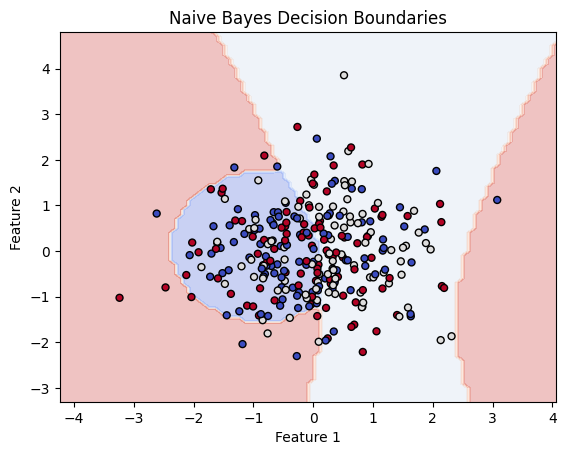

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

# Define Data
Fruit = ['Orange', 'Banana', 'Other']
Behavior = ['yellow', 'sweet', 'long']
Behavior_array = np.array([[350, 450, 0], [400, 300, 350], [50, 100, 150]])

# Label Encoding
le = LabelEncoder()
Behavior_encoded = le.fit_transform(Behavior)

# Encode Fruit for Naive Bayes Model
Fruit_encoded = le.fit_transform(Fruit)

# Create a synthetic dataset for visualization
np.random.seed(42)
X_synthetic = np.random.randn(300, 2)  # Generate 300 samples with 2 features
y_synthetic = np.random.choice(Fruit_encoded, 300)  # Randomly assign one of the encoded fruits

# Fit Naive Bayes Model on synthetic data
nb = GaussianNB()
nb.fit(X_synthetic, y_synthetic)

# Plot decision boundaries
x_min, x_max = X_synthetic[:, 0].min() - 1, X_synthetic[:, 0].max() + 1
y_min, y_max = X_synthetic[:, 1].min() - 1, X_synthetic[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_synthetic[:, 0], X_synthetic[:, 1], c=y_synthetic, marker='o', s=25, edgecolor='k', cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()